In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField
import pandas_datareader.data as web
import datetime
from random import randint

## Download data

In [2]:
a = np.array([range(20)])
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2020, 12, 31)
df = web.DataReader('^GSPC','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


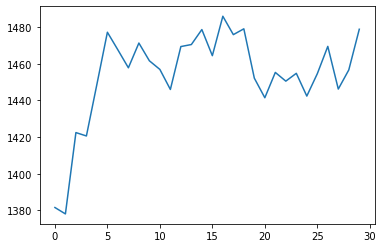

In [65]:
sp500 = df.Close.to_numpy()
sp500.shape
prices = sp500[100:130]
plt.plot(prices)

In [79]:
def transform(arr):
    arr = arr.reshape(1,-1)
    diff_mat = GramianAngularField(method='difference').transform(arr)[0]
    sum_mat = GramianAngularField(method='summation').transform(arr)[0]
    diff_mat = (diff_mat+np.ones_like(diff_mat))/2
    sum_mat = (sum_mat+np.ones_like(sum_mat))/2
    return np.dstack((diff_mat, sum_mat, np.zeros_like(diff_mat)))

def visualize(arr):
    fig, (ax1,ax2) = plt.subplots(1,2)
    ax1.plot(arr)
    ax2.matshow(transform(arr))

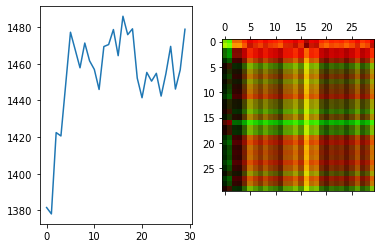

In [80]:
visualize(prices)

## Reverting GAF
The matrix is defined as
$$A_{ij} = cos(\theta_i+\theta_j)$$
$$\theta_k = arccos(x_k)$$
First we find the angle sums
$$ B_{ij} = arccos(A_{ij})$$
Then we get
$$\theta_1 = \frac{(\theta_1+\theta_2)-(\theta_2+\theta_3)+(\theta_1+\theta_3)}{2} = \frac{A_{12}-A_{23}+A_{13}}{2}$$
And then iterate
$$\theta_2 = A_{12}-\theta_1$$
$$\theta_k = A_{k(k-1)}-\theta_{k-1}$$

In [59]:
def revert(mat, test):
    n = mat.shape[0]
    mat = np.arccos(mat)
    polar = [(mat[0,1]-mat[1,2]+mat[0,3])/2]
    for i in range(1,n):
        polar.append(mat[i,i-1]-polar[-1])
    return np.cos(polar)

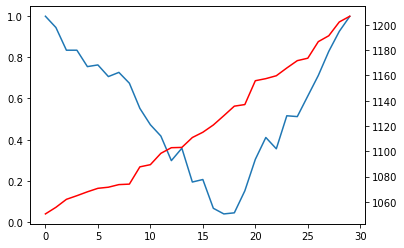

In [60]:
a = prices[-1]
a = np.sort(a)
mat = transformer.transform(a.reshape(1,-1))[0]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
generated = revert(mat, a)
ax1.plot(generated)
ax2.plot(a,color='r')